### Import the features

In [ ]:
#A.I free code. All of the classifiers are written by Abdullah Aljishi with help from reading documentation & Stack echange
import pandas as pd
data = pd.read_csv('features_digit_0.csv') #Read digit 0 data
for i in range (1,10): #Efficiently add the other digits using dynamic variable names. Tricks chatGPT can't do.
    globals()['data' + str(i)] = pd.read_csv('features_digit_'+str(i)+'.csv')
    data = pd.concat([data,globals()['data'+str(i)]],axis=0)

data.drop(columns='file') #Drop the file name as it is not useful
data.sample(10) #Check the dataframe 
#(3000 x 9), 3000 digits with a label + 8 features


,file,digit,mean_zcr,mean_rms,energy,autocorr_lag1,mean_envelope,max_envelope,duration,mean_amplitude
140,8_lucas_45.wav,8,0.211792,0.081602,38.431730,0.727599,0.069456,1.050063,0.490875,0.044947
255,3_yweweler_13.wav,3,0.146554,0.183705,133.482330,0.814388,0.200835,1.114292,0.384000,0.128457
247,7_theo_7.wav,7,0.299425,0.082897,54.263912,0.855919,0.075927,1.000386,0.571000,0.047204
273,2_yweweler_3.wav,2,0.117676,0.107446,32.466385,0.730819,0.095753,1.016339,0.280125,0.060714
99,6_jackson_9.wav,6,0.315017,0.084068,111.304530,0.889091,0.070583,1.142763,0.826125,0.044895
257,8_yweweler_15.wav,8,0.127686,0.097067,23.637915,0.648362,0.103222,1.062116,0.235000,0.065049
207,5_theo_15.wav,5,0.169515,0.158012,94.110660,0.819044,0.192900,1.031582,0.328000,0.120378
153,2_nicolas_11.wav,2,0.190430,0.219958,162.495560,0.947946,0.240510,1.065156,0.343000,0.156047
81,8_jackson_37.wav,8,0.201102,0.183949,174.178760,0.829885,0.211630,1.227035,0.406125,0.134319
17,7_george_24.wav,7,0.274121,0.094380,62.494038,0.438476,0.084503,1.066478,0.638500,0.052478


### Split the data into 70/30 training/testing, and normalize

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

trainset, testset, train_labels, test_labels = train_test_split(data.iloc[:, 2:], data["digit"], test_size=0.30, random_state=42) #Create the training and testing sets. 70/30 split

print(trainset)
#(2100 x 8), as in 2100 digits each with 8 features. 2100 being 70% of the original 3000 digits
print(testset)
#(900 x 8)

scaler = StandardScaler()
trainset=scaler.fit_transform(trainset)
testset=scaler.fit_transform(testset)


     mean_zcr  mean_rms      energy  autocorr_lag1  mean_envelope  \
11   0.074568  0.246611  262.768900       0.949984       0.318622   
230  0.103809  0.154320   70.591400       0.869450       0.174648   
87   0.068945  0.189217  221.731000       0.928769       0.256631   
49   0.133084  0.179137  172.843750       0.706835       0.204051   
83   0.364569  0.099129  111.013145       0.827847       0.088092   
..        ...       ...         ...            ...            ...   
138  0.260688  0.099986   69.774280       0.807533       0.084303   
195  0.163783  0.172552  121.683110       0.927762       0.207742   
230  0.078613  0.277865  224.289250       0.950064       0.355649   
94   0.103638  0.218191  261.716030       0.919617       0.263276   
260  0.134473  0.211014  119.120705       0.941732       0.209681   

     max_envelope  duration  mean_amplitude  
11       1.060689  0.402500        0.201544  
230      1.034017  0.280500        0.111250  
87       1.088850  0.581125      

### Create MLP and train it

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = MLPClassifier(
                      hidden_layer_sizes=(128,64,32,16), #Architecture is 4 hidden layers as follows: 8 input x 128x64x32x16 hidden layers x 10 outputs
                      activation='relu', #Relu for hidden layers activation function
                      solver='sgd', #Stochastic gradient descent
                      alpha=0.001, #Lambda in class, the strength of L2 regularization
                      learning_rate='adaptive', #Learning rate is divided by 5 if two consecutive epochs fail to decrease training loss by at least the tolerance (defined belowe)
                      learning_rate_init=0.03, #Initial learning rate
                      tol= 0.00001, #Tolerance for adaptive learning condition
                      momentum=0.9, #Momentum for gradient descent
                      random_state=12,  #Seed for reproducability
                      max_iter=10000, #Number of epochs
                      shuffle=True, #Shuffle samples in each new epoch
                      verbose=True, #Print details each epoch
                      n_iter_no_change=10, #Stop training after this many epochs without improvements of at least tol in the loss
                      ).fit(trainset, train_labels)



Iteration 1, loss = 2.33922496
Iteration 2, loss = 2.21810248
Iteration 3, loss = 2.12770339
Iteration 4, loss = 2.02190520
Iteration 5, loss = 1.91522351
Iteration 6, loss = 1.80578132
Iteration 7, loss = 1.71391616
Iteration 8, loss = 1.64568326
Iteration 9, loss = 1.58458855
Iteration 10, loss = 1.53339804
Iteration 11, loss = 1.49243381
Iteration 12, loss = 1.45044308
Iteration 13, loss = 1.42864257
Iteration 14, loss = 1.38696136
Iteration 15, loss = 1.36714559
Iteration 16, loss = 1.34269154
Iteration 17, loss = 1.32304501
Iteration 18, loss = 1.30162686
Iteration 19, loss = 1.28709959
Iteration 20, loss = 1.27075668
Iteration 21, loss = 1.24796266
Iteration 22, loss = 1.23256504
Iteration 23, loss = 1.20920486
Iteration 24, loss = 1.20368882
Iteration 25, loss = 1.18474268
Iteration 26, loss = 1.16215987
Iteration 27, loss = 1.14954687
Iteration 28, loss = 1.14793016
Iteration 29, loss = 1.12969963
Iteration 30, loss = 1.10964925
Iteration 31, loss = 1.10083491
Iteration 32, los

### Test the MLP

Accuracy is  0.61
Precision is  0.6092
Recall is  0.6103
F1 score is  0.6083


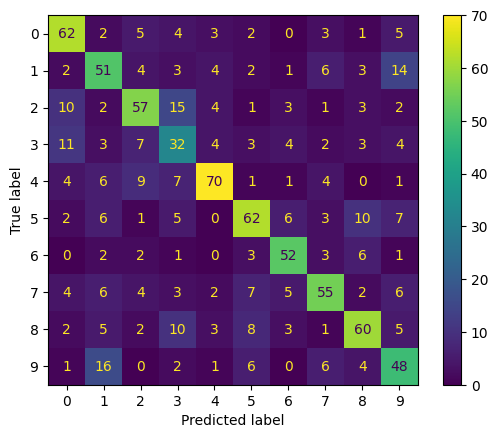

In [39]:
import torch as torch
from torcheval.metrics.functional import multiclass_f1_score, multiclass_recall, multiclass_precision
true_labels_tensor = torch.tensor(test_labels.values)
pred_labels_tensor = torch.tensor(model.predict(testset))
acc = model.score(testset,test_labels)
prec = round(multiclass_precision(pred_labels_tensor,true_labels_tensor,average="macro",num_classes=10).item(),4)
recall = round(multiclass_recall(pred_labels_tensor,true_labels_tensor,average="macro",num_classes=10).item(),4)
f1 = round(multiclass_f1_score(pred_labels_tensor,true_labels_tensor,average="macro",num_classes=10).item(),4)
print("Accuracy is ", acc)
print("Precision is ", prec)
print("Recall is ", recall)
print("F1 score is ", f1)
cm = confusion_matrix(model.predict(testset), test_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()